In [37]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib 
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline


df = pd.read_excel(r'C:\Users\Bruno\Documents\Python Scripts\projetos\vinho\BlogOsVinhos.xlsx')


In [77]:
df.sort_values(by='JudgeRating', ascending=False).head()

,Name,Region,Year,Color,Castes,AlcoholPercentage,Producer,MinimunPrice,MaximumPrice,Judge,JudgeRating,Date,JudgeNotes,Label,Link
1798,Ferrer Bobet Selecció Especial Vinyes Velles 2010,Espanha,2010,Red,Cariñena e Vinhas Velhas,14.5,Ferrer Bobet,50.0,75.0,Isabel Fortuny e Raül Bobet,19.0,Agosto 2015,Apresenta uma cor rubi praticamente opaca no c...,Aquest vi està elaborat amb rafm de vinyes vel...,https://osvinhos.blogspot.pt/2014/11/3373-ferr...
830,Casa Ferreirinha Reserva Especial 1986,DOC Douro,1986,Red,Várias,12.5,"Sogrape Vinhos de Portugal, SA",50.0,75.0,Fernando Nicolau de Almeida,18.5,Dezembro 2011,Apresenta uma bonita e concentrada cor granada...,Cuidadosamente vinificado na Adega da Quinta d...,https://osvinhos.blogspot.pt/2012/05/2218-casa...
2719,Mauro Vendimia Seleccionada 2009,Espanha,2009,Red,Tempranillo,14.5,Bodegas Mauro S.A.,50.0,75.0,Mariano García,18.0,Setembro 2016,Apresenta uma cor rubi intensa e profunda no c...,Variedad - Tempranillo 100%. Embotellado - Dic...,https://osvinhos.blogspot.pt/2015/02/3498-maur...
1799,Ferrer Bobet Vinyes Velles 2010,Espanha,2010,Red,"Cariñena, Garnacha Tinta e Vinhas Velhas",14.5,Ferrer Bobet,25.0,50.0,Isabel Fortuny e Raül Bobet,18.0,Fevereiro 2017,Cor opaca no centro e auréola de forte tonalid...,Aquest vi està elaborat amb rafm de vinyes vel...,https://osvinhos.blogspot.pt/2014/03/3082-ferr...
1217,Cortes de Cima Reserva 2004,Regional Alentejo,2004,Red,"Aragonez, Touriga Nacional, Syrah e Cabernet S...",14.0,"Casa Agrícola Cortes de Cima, Lda",50.0,75.0,Hans Kristian Jorgensen,18.0,Outubro 2010,Cor granada carregada e nariz muito elegante e...,Cortes de Cima é uma propriedade famíliar. As ...,https://osvinhos.blogspot.pt/2010/02/1229-cort...


In [15]:
df.describe()

,Year,AlcoholPercentage,MinimunPrice,MaximumPrice,JudgeRating
count,2993.000000,2993.000000,2993.000000,2993.000000,2993.000000
mean,1999.868694,13.405112,9.657701,14.688573,15.639492
std,130.829079,0.939524,8.548043,40.881400,1.130448
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2005.000000,13.000000,4.000000,7.500000,15.000000
50%,2009.000000,13.500000,7.500000,10.000000,15.500000
75%,2013.000000,14.000000,12.500000,15.000000,16.500000
max,2018.000000,17.000000,155.000000,2150.000000,19.000000


In [14]:
df.isnull().sum()

Name                  0
Region                4
Year                  0
Color                 0
Castes                4
AlcoholPercentage     0
Producer              0
MinimunPrice          0
MaximumPrice          0
Judge                 0
JudgeRating           0
Date                 23
JudgeNotes            1
Label                 1
Link                  0
dtype: int64

In [17]:
#Duplicates
extra = df[df.duplicated()]
extra.shape

(1, 15)

In [22]:
df.dtypes

Name                  object
Region                object
Year                   int64
Color                 object
Castes                object
AlcoholPercentage    float64
Producer              object
MinimunPrice         float64
MaximumPrice         float64
Judge                 object
JudgeRating          float64
Date                  object
JudgeNotes            object
Label                 object
Link                  object
dtype: object

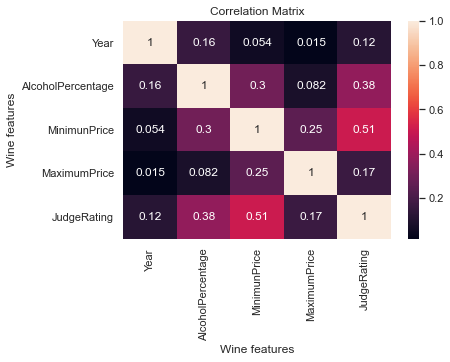

In [32]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Wine features')
plt.ylabel('Wine features')
plt.show()


In [35]:
#Observations:
#High prices have no influence in the ratings given by the judges even tho it looked like it at a first look
#Many low cost wines are ranked with a high rating from the judges

C:\Users\Bruno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


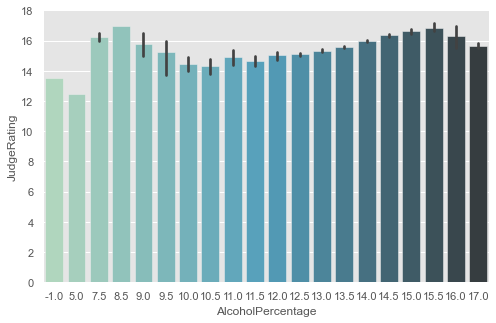

In [75]:
plt.figure(figsize=(8,5))
sns.barplot(df['AlcoholPercentage'],df['JudgeRating'],palette="GnBu_d")
plt.show()

In [41]:
top_10_regions = df.Region.value_counts().sort_values(ascending=False).head(10)
top_10_regions

Regional Alentejo                687
DOC Douro                        616
DOC Alentejo                     211
Regional Península de Setúbal    180
Espanha                          153
DOC Dão                          128
DOC Vinhos Verdes                102
Argentina                         96
França                            92
Regional Lisboa                   75
Name: Region, dtype: int64

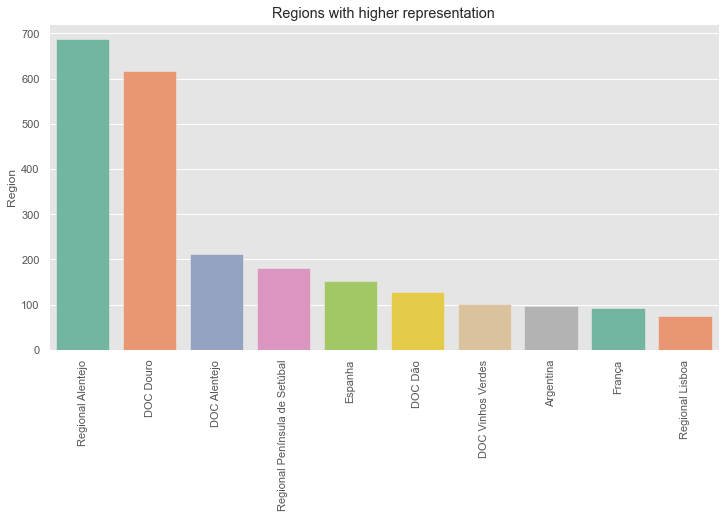

In [45]:
#Plotting the top  10 regions
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
plt.title('Regions with higher representation')
sns.barplot(x=top_10_regions.index, y=top_10_regions, palette='Set2');

In [49]:
regional_alentejo = df.query('Region == "Regional Alentejo"').sort_values(by='JudgeRating',ascending=False)
regional_alentejo

,Name,Region,Year,Color,Castes,AlcoholPercentage,Producer,MinimunPrice,MaximumPrice,Judge,JudgeRating,Date,JudgeNotes,Label,Link
242,Altas Quintas Reserva 2005,Regional Alentejo,2005,Red,"Trincadeira, Aragonês e Alicante Bouschet",14.5,"Altas Quintas, Lda",25.0,50.0,Paulo Laureano,18.0,Setembro 2008,"Cor de grande intensidade, quase opaca, os aro...",Altas Quintas Reserva é um vinho fiel à nossa ...,https://osvinhos.blogspot.pt/2009/02/986-altas...
1217,Cortes de Cima Reserva 2004,Regional Alentejo,2004,Red,"Aragonez, Touriga Nacional, Syrah e Cabernet S...",14.0,"Casa Agrícola Cortes de Cima, Lda",50.0,75.0,Hans Kristian Jorgensen,18.0,Outubro 2010,Cor granada carregada e nariz muito elegante e...,Cortes de Cima é uma propriedade famíliar. As ...,https://osvinhos.blogspot.pt/2010/02/1229-cort...
241,Altas Quintas Reserva 2004,Regional Alentejo,2004,Red,"Trincadeira, Aragonês e Alicante Bouschet",14.5,"Altas Quintas, Lda",25.0,50.0,Paulo Laureano,17.5,Dezembro 2010,"Aromas fantásticos, muito perfumados e doces, ...",Altas Quintas Reserva é um vinho fiel à nossa ...,https://osvinhos.blogspot.pt/2007/08/588-altas...
2932,Mouchão 2001,Regional Alentejo,2001,Red,Alicante Bouschet e Trincadeira,13.0,"Vinhos da Cavaca Dourada, SA",20.0,25.0,Paulo Laureano,17.5,Junho 2007,"Aromas intensos, frutos pretos bem maduros e e...",-,https://osvinhos.blogspot.pt/2007/01/375-mouch...
1215,Cortes de Cima Incógnito 2003,Regional Alentejo,2003,Red,Syrah,14.5,"Casa Agrícola Cortes de Cima, Lda",50.0,75.0,Hans Kristian Jorgensen,17.5,Julho 2007,Cor carregada e aromas muito frutados e perfum...,-,https://osvinhos.blogspot.pt/2007/11/667-corte...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,Couteiro-Mor 2004,Regional Alentejo,2004,Red,"Aragonês, Castelão e Trincadeira",13.0,Sociedade Agrícola Gabriel Francisco Dias & Fi...,2.0,4.0,João Melícias e Jorge Páscoa,13.0,Maio 2006,Aromas de frutos maduros presentes mas sem imp...,"Das nossas vinhas, são colhidas, casta a casta...",https://osvinhos.blogspot.pt/2006/08/234-coute...
1360,Dogma 2005,Regional Alentejo,2005,Red,"Aragonês, Trincadeira e Syrah",14.0,"Bacalhôa Vinhos de Portugal, S.A.",2.0,4.0,Filipa Tomaz da Costa e Vasco Penha Garcia,13.0,Setembro 2006,"Vinho fresco e macio, aromas e paladar frutado...","Produzido a partir das castas Aragonês, Trinca...",https://osvinhos.blogspot.pt/2006/10/274-dogma...
1184,Convento da Vila 2004,Regional Alentejo,2004,Red,"Trincadeira, Aragonez e Castelão",12.5,"Adega Cooperativa de Borba, C.R.L.",-1.0,2.0,Óscar Gato,13.0,Maio 2005,"Cor rubi mas pouco concentrada, frutos vermelh...",-,https://osvinhos.blogspot.pt/2006/03/89-conven...
2609,Marianito 2005,Regional Alentejo,2005,Red,Tinta Grossa e Aragonêz,12.5,Gonçalo Matos,2.0,4.0,Gonçalo Matos,11.5,Novembro 2006,"Cor bem vermelha e de aromas pouco frutados, n...","Produzido e engarrafado por Gonçalo Matos, no ...",https://osvinhos.blogspot.pt/2007/04/458-maria...


In [63]:
regional_alentejo_pVr = regional_alentejo[(regional_alentejo.MaximumPrice <= 10 ) & (regional_alentejo.JudgeRating >= 16) & (regional_alentejo.Name !='Mouchão Tonel 3-4 2011')]
regional_alentejo_pVr

,Name,Region,Year,Color,Castes,AlcoholPercentage,Producer,MinimunPrice,MaximumPrice,Judge,JudgeRating,Date,JudgeNotes,Label,Link
2247,Herdade Grande Gerações Colheita Seleccionada ...,Regional Alentejo,2014,White,Verdelho e Alvarinho,13.5,Herdade Grande - António Manuel Lança,7.5,10.0,Luís Duarte,17.0,Março 2017,"De cor amarela brilhante e um nariz vibrante, ...","O vinho embeleza os campos, exalta os corações...",https://osvinhos.blogspot.pt/2017/09/4528-herd...
1723,Esporão Verdelho 2015,Regional Alentejo,2015,White,Verdelho,13.5,Esporão S.A.,7.5,10.0,David Baverstock e Sandra Alves,16.5,Janeiro 2018,Apresenta uma cor amarela de média intensidade...,Exploramos a riqueza da tradição e dos terroir...,https://osvinhos.blogspot.pt/2017/03/4352-espo...
1722,Esporão Verdelho 2014,Regional Alentejo,2014,White,Verdelho,13.5,Esporão S.A.,7.5,10.0,David Baverstock e Sandra Alves,16.5,Agosto 2015,Apresenta uma cor amarela citrina com laivos e...,Exploramos a riqueza da tradição e dos terroir...,https://osvinhos.blogspot.pt/2016/03/3964-espo...
2779,Monte Cascas Reserva Alentejo 2011,Regional Alentejo,2011,Red,"Alicante Bouschet, Aragonez e Trincadeira",14.5,Casca Wines,7.5,10.0,Helder Cunha,16.5,Dezembro 2014,Cor rubi intensa e nariz rico em aromas de fru...,Casca Wines é um projecto de Enólogos que deci...,https://osvinhos.blogspot.pt/2015/11/3824-mont...
2279,Herdade São Miguel Touriga Nacional 2008,Regional Alentejo,2008,Red,Touriga Nacional,14.5,"Casa Agrícola Alexandre Relvas, Lda",7.5,10.0,Luís Duarte e Nuno Franco,16.5,Agosto 2010,Cor intensa e aromas vivos e ricos de fruta ve...,A primavera comprida e amena assim como o verã...,https://osvinhos.blogspot.pt/2011/01/1619-herd...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,Dona Maria 2008,Regional Alentejo,2008,White,"Viosinho, Arinto e Antão Vaz",13.5,Júlio Tassara de Bastos,7.5,10.0,Luís Duarte e Sandra Gonçalves,16.0,Abril 2010,"Apresenta uma cor límpida, com suaves notas am...","Esta quinta criada em 1718, onde se produz o v...",https://osvinhos.blogspot.pt/2011/02/1628-dona...
1464,Dona Maria 2006,Regional Alentejo,2006,Red,"Aragonês, Alicante Bouschet, Syrah e Cabernet ...",14.0,Júlio Tassara de Bastos,7.5,10.0,Luís Duarte e Sandra Gonçalves,16.0,Agosto 2010,Cor intensa e nariz perfumado por notas florai...,"Esta quinta criada em 1718, onde se produz o v...",https://osvinhos.blogspot.pt/2011/02/1629-dona...
2367,José de Sousa 2001,Regional Alentejo,2001,Red,"Trincadeira, Aragonês e Grand Noir",13.0,"José Maria da Fonseca Vinhos, S.A.",4.0,7.5,Domingos Soares Franco,16.0,Julho 2005,"Cor ligeiramente acastanhada, aromas a frutos ...","Localizada no coração do Alentejo, esta propri...",https://osvinhos.blogspot.pt/2006/03/77-jos-de...
2,.Beb 2010,Regional Alentejo,2010,Red,"Cabernet Sauvignon, Syrah, Alicante Bouschet e...",14.0,Tiago Mateus Cabaço e Cabaço,7.5,10.0,Tiago Cabaço,16.0,Agosto 2013,Apresenta uma cor rubi agradavelmente concentr...,A escolha criteriosa das melhores parcelas das...,https://osvinhos.blogspot.pt/2014/01/2988-beb-...


In [64]:
doc_douro = df.query('Region == "DOC Douro"').sort_values(by='JudgeRating', ascending=False)
doc_douro

,Name,Region,Year,Color,Castes,AlcoholPercentage,Producer,MinimunPrice,MaximumPrice,Judge,JudgeRating,Date,JudgeNotes,Label,Link
830,Casa Ferreirinha Reserva Especial 1986,DOC Douro,1986,Red,Várias,12.5,"Sogrape Vinhos de Portugal, SA",50.0,75.0,Fernando Nicolau de Almeida,18.5,Dezembro 2011,Apresenta uma bonita e concentrada cor granada...,Cuidadosamente vinificado na Adega da Quinta d...,https://osvinhos.blogspot.pt/2012/05/2218-casa...
1536,Duas Quintas Reserva 2001,DOC Douro,2001,Red,Touriga Nacional e Tinta Barroca,14.0,Ramos Pinto,20.0,25.0,João Nicolau de Almeida,18.0,Fevereiro 2011,Aromas cheios de frutos pretos e notas florais...,"A casa RAMOS PINTO, fundada em 1880, mantém ai...",https://osvinhos.blogspot.pt/2007/01/371-duas-...
415,Barca Velha 1999,DOC Douro,1999,Red,"Tinta Roriz, Touriga Franca, Touriga Nacional ...",13.0,"Sogrape Vinhos de Portugal, SA",100.0,-1.0,Luís Sottomayor,18.0,Outubro 2013,"Cor granada, nariz marcado pela elegância, com...",-,https://osvinhos.blogspot.pt/2009/12/1168-barc...
441,Batuta 2004,DOC Douro,2004,Red,"Touriga Franca, Tinta Roriz, Touriga Nacional ...",14.0,"Niepoort Vinhos, S.A.",50.0,75.0,Dirk Niepoort,18.0,Outubro 2011,"Apresenta uma cor intensa e concentrada, o nar...",-,https://osvinhos.blogspot.pt/2008/05/834-batut...
1567,Duorum Reserva Vinhas Velhas 2011,DOC Douro,2011,Red,"Vinhas Velhas, Touriga Nacional, Touriga Franc...",14.0,"Duorum Vinhos, SA",20.0,25.0,José Maria Soares Franco,18.0,Junho 2018,Apresenta uma cor opaca e profunda no centro e...,Duorum exprime todo o terroir da fantástica re...,https://osvinhos.blogspot.pt/2015/03/3534-duor...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,Charamba 2001,DOC Douro,2001,Red,"Tinta Roriz, Tinta Barroca, Touriga Franca e T...",12.0,Sociedade Agrícola e Comercial da Quinta da Av...,4.0,7.5,Manuel Soares,12.5,Julho 2005,Aroma intenso a contrastar com taninos revelad...,"Nas quentes encostas do Vale do Douro, as cast...",https://osvinhos.blogspot.pt/2006/04/117-chara...
2459,Lagar Velho 2000,DOC Douro,2000,Red,"Touriga Franca, Tinta Roriz e Tinta Barroca",12.5,"Caves Velhas, Companhia Port Vinhos de Marca",4.0,7.5,Carlos Eduardo,12.5,Agosto 2005,"Aromas a frutos vermelhos pouco atraente, melh...",-,https://osvinhos.blogspot.pt/2006/07/188-lagar...
954,Caves Santa Marta 2002,DOC Douro,2002,Red,Touriga Franca e Tinta Barroca,12.5,"Caves Santa Marta - Vinhos e Derivados, C.R.L.",2.0,4.0,Eduardo Natividade,12.5,Novembro 2004,Vinho jovem a condizer com os aromas que apres...,Vinho produzido de castas recomendadas para a ...,https://osvinhos.blogspot.pt/2006/01/28-caves-...
955,Caves Santa Marta Reserva 2001,DOC Douro,2001,Red,"Touriga Franca, Tinta Barroca e Tinta Roriz",13.0,"Caves Santa Marta - Vinhos e Derivados, C.R.L.",2.0,4.0,Eduardo Natividade,12.0,Janeiro 2005,Aromas a frutos pouco evoluídos mas a revelar ...,"Este Reserva 2001, é o resultado de um rigoros...",https://osvinhos.blogspot.pt/2006/03/65-caves-...


In [71]:
doc_douro_pVr = doc_douro[(doc_douro.MaximumPrice <= 10) & (doc_douro.JudgeRating >= 16) & (doc_douro.MaximumPrice > 0)]
doc_douro_pVr

,Name,Region,Year,Color,Castes,AlcoholPercentage,Producer,MinimunPrice,MaximumPrice,Judge,JudgeRating,Date,JudgeNotes,Label,Link
653,CARM Reserva 2008,DOC Douro,2008,Red,"Tinta Roriz, Touriga Franca e Touriga Nacional",13.0,"CARM - Casa Agrícola Roboredo Madeira, Lda",7.5,10.0,Rui Madeira,17.0,Maio 2011,Apresenta uma cor cheia de tonalidade rubi/avi...,-,https://osvinhos.blogspot.pt/2011/09/1917-carm...
1481,Dona Matilde 2007,DOC Douro,2007,Red,Vinhas Velhas,13.5,Quinta Dona Matilde,7.5,10.0,João Pissarra e José Maria Machado,16.5,Fevereiro 2009,"De cor intensa e brilhante auréola violeta, os...",Dona Matilde é uma Marca Registada que pertenc...,https://osvinhos.blogspot.pt/2010/03/1263-dona...
709,Casa Burmester Reserva 2007,DOC Douro,2007,Red,"Touriga Nacional, Touriga Franca e Tinta Roriz",13.5,"J. W. Burmester & Cª, S.A.",7.5,10.0,Francisco Gonçalves e Pedro Sá,16.5,Março 2011,"Cor intensa e concentrada, apresenta um nariz ...",O Casa Burmester simboliza a história e tradiç...,https://osvinhos.blogspot.pt/2011/06/1816-casa...
708,Casa Burmester Reserva 2006,DOC Douro,2006,Red,"Touriga Nacional, Touriga Franca e Tinta Roriz",13.5,"J. W. Burmester & Cª, S.A.",7.5,10.0,Francisco Gonçalves e Pedro Sá,16.5,Novembro 2008,Apresenta uma cor opaca no centro e avioletada...,O Casa Burmester simboliza a história e tradiç...,https://osvinhos.blogspot.pt/2010/02/1221-casa...
729,Casa da Palmeira Reserva 2004,DOC Douro,2004,Red,"Tinta Roriz, Touriga Franca e Touriga Nacional",13.5,Quinta de Vila Maior - Manuel Joaquim Pinto,4.0,7.5,Álvaro Van Zeller,16.5,Outubro 2009,Apresenta uma cor rubi e um nariz muito agradá...,-,https://osvinhos.blogspot.pt/2010/10/1480-casa...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,Castello D'Alba Vinhas Velhas 2016,DOC Douro,2016,White,"Vinhas Velhas, Códega de Larinho, Rabigato e V...",13.5,Rui Roboredo Madeira Vinhos S.A.,7.5,10.0,Rui Roboredo Madeira,16.0,Fevereiro 2018,Cor amarelo palha e nariz muito mineral e tost...,"Códega de Larinho (60%), Rabigato (20%), Viosi...",https://osvinhos.blogspot.com/2018/09/4885-cas...
1179,Contraste 2011,DOC Douro,2011,White,"Códega, Rabigato e Viosinho",13.0,"Conceito - Sociedade de Vinhos, Lda",7.5,10.0,Rita Marques,16.0,Maio 2013,Cor amarelo citrino e nariz marcado por fresco...,"No que ao vinho de consumo diz respeito, o val...",https://osvinhos.blogspot.pt/2014/03/3072-cont...
916,Castello D'Alba Reserva 2007,DOC Douro,2007,White,Côdega do Larinho e Malvasia Fina,13.0,"VDS - Vinhos do Douro Superior, Lda",4.0,7.5,"Joaquim Anacleto, Rui Madeira e João Matos",16.0,Agosto 2009,Apresenta uma cor amarelo suave e uns vivos ar...,-,https://osvinhos.blogspot.pt/2010/08/1433-cast...
920,Castello D'Alba Vinhas Velhas Códega de Larinh...,DOC Douro,2009,White,Côdega do Larinho,14.0,"VDS - Vinhos do Douro Superior, Lda",7.5,10.0,Rui Roboredo Madeira,16.0,Julho 2011,Apresenta uma cor amarela de tonalidade palha ...,Este vinho reflecte a nossa paixão pelo Douro ...,https://osvinhos.blogspot.pt/2011/07/1852-cast...


In [89]:
best_pVr = df[(df.MaximumPrice <= 10) & (df.JudgeRating >= 16) & (df.MinimunPrice <= 10)].sort_values(by='JudgeRating', ascending=False)
best_pVr

,Name,Region,Year,Color,Castes,AlcoholPercentage,Producer,MinimunPrice,MaximumPrice,Judge,JudgeRating,Date,JudgeNotes,Label,Link
1253,Cova da Ursa Chardonnay 2014,Regional Península de Setúbal,2014,White,Chardonnay,14.5,"Bacalhôa Vinhos de Portugal, S.A.",7.5,10.0,Filipa Tomaz da Costa e Vasco Penha Garcia,17.0,Abril 2017,"Cor amarela brilhante e nariz fino e elegante,...",Produzido com uvas da casta Chardonnay da noss...,https://osvinhos.blogspot.pt/2016/02/3918-cova...
680,Cartuxa 2014,DOC Alentejo,2014,White,Antão Vaz e Arinto,14.0,Fundação Eugénio de Almeida,7.5,10.0,Pedro Baptista,17.0,Setembro 2018,Cor amarela algo citrina e nariz rico de aroma...,Estes vinhos associam a sua qualidade ao nome ...,https://osvinhos.blogspot.pt/2016/09/4137-cart...
653,CARM Reserva 2008,DOC Douro,2008,Red,"Tinta Roriz, Touriga Franca e Touriga Nacional",13.0,"CARM - Casa Agrícola Roboredo Madeira, Lda",7.5,10.0,Rui Madeira,17.0,Maio 2011,Apresenta uma cor cheia de tonalidade rubi/avi...,-,https://osvinhos.blogspot.pt/2011/09/1917-carm...
246,Altos de Tamaron Reserva 2002,Espanha,2002,Red,Tempranillo,13.5,"Pagos del Rey, S.I.",7.5,10.0,Félix Solís,17.0,Janeiro 2007,Aromas de muita fruta preta e madeira de quali...,Vino elaborado com uvas Tempranillo y envejeci...,https://osvinhos.blogspot.pt/2006/12/348-altos...
2247,Herdade Grande Gerações Colheita Seleccionada ...,Regional Alentejo,2014,White,Verdelho e Alvarinho,13.5,Herdade Grande - António Manuel Lança,7.5,10.0,Luís Duarte,17.0,Março 2017,"De cor amarela brilhante e um nariz vibrante, ...","O vinho embeleza os campos, exalta os corações...",https://osvinhos.blogspot.pt/2017/09/4528-herd...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
812,Casa Ermelinda Freitas Reserva Touriga Naciona...,Regional Península de Setúbal,2013,Red,Touriga Nacional,14.5,Casa Ermelinda Freitas,7.5,10.0,Jaime Quendera,16.0,Fevereiro 2018,Cor avermelhada e nariz marcadamente floral e ...,Para nós a procura de novos paladares e aromas...,https://osvinhos.blogspot.pt/2017/07/4477-casa...
810,Casa Ermelinda Freitas Reserva Syrah 2014,Regional Península de Setúbal,2014,Red,Syrah,14.0,Casa Ermelinda Freitas,7.5,10.0,Jaime Quendera,16.0,Julho 2018,Apresenta uma cor granada intensa e um nariz r...,Para nós a procura de novos paladares e aromas...,https://osvinhos.blogspot.com/2019/03/5074-cas...
809,Casa Ermelinda Freitas Reserva Syrah 2013,Regional Península de Setúbal,2013,Red,Syrah,14.5,Casa Ermelinda Freitas,7.5,10.0,Jaime Quendera,16.0,Janeiro 2017,Cor rubi concentrada e nariz rico em fruta pre...,Para nós a procura de novos paladares e aromas...,https://osvinhos.blogspot.pt/2016/12/4250-casa...
805,Casa Ermelinda Freitas Reserva Alicante Bousch...,Regional Península de Setúbal,2013,Red,Alicante Bouschet,14.5,Casa Ermelinda Freitas,7.5,10.0,Jaime Quendera,16.0,Janeiro 2017,"Cor intensa e concentrada, o nariz revela frut...",Para nós a procura de novos paladares e aromas...,https://osvinhos.blogspot.pt/2017/07/4466-casa...


In [95]:
best_pVr.to_excel('best price wines.xlsx')
